In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Input, Convolution2D, Convolution3D, MaxPool2D, Dense, Dropout, Flatten

Using TensorFlow backend.


#### data preparation

In [0]:
from keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [0]:
# convert the label into one hot encoded
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

### CNN Model

In [0]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape = (28, 28, 1)))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2, 2))
model.add(Convolution2D(32, (5, 5), activation='relu'))
model.add(Convolution2D(16, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
## compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 16)          12816     
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
__________

In [29]:
hist = model.fit(x_train,y_train,epochs=30,shuffle=True, batch_size=512, validation_split=0.135)

Train on 51900 samples, validate on 8100 samples
Epoch 1/30
51900/51900 [==============================] - 4s 84us/step - loss: 0.9051 - acc: 0.6731 - val_loss: 0.6003 - val_acc: 0.7875
Epoch 2/30
51900/51900 [==============================] - 3s 65us/step - loss: 0.5022 - acc: 0.8191 - val_loss: 0.4652 - val_acc: 0.8341
Epoch 3/30
51900/51900 [==============================] - 3s 65us/step - loss: 0.4182 - acc: 0.8536 - val_loss: 0.4334 - val_acc: 0.8533
Epoch 4/30
51900/51900 [==============================] - 3s 66us/step - loss: 0.3764 - acc: 0.8675 - val_loss: 0.3857 - val_acc: 0.8633
Epoch 5/30
51900/51900 [==============================] - 3s 66us/step - loss: 0.3451 - acc: 0.8775 - val_loss: 0.3596 - val_acc: 0.8743
Epoch 6/30
51900/51900 [==============================] - 3s 67us/step - loss: 0.3204 - acc: 0.8860 - val_loss: 0.3510 - val_acc: 0.8790
Epoch 7/30
51900/51900 [==============================] - 3s 66us/step - loss: 0.3068 - acc: 0.8909 - val_loss: 0.3287 - val_acc:

training_loss = 0.14469041676879618    val_loss = 0.22999097168445587
training_acc = 94.72061657170569    val_acc = 91.90123466503472


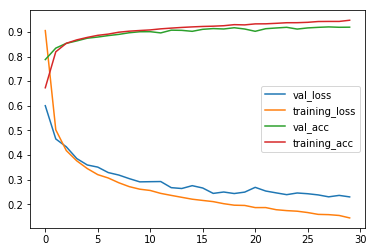

In [30]:
# plot loss
print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='training_loss')

# plot loss
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['acc'], label='training_acc')
plt.legend()
plt.show()

In [0]:
p = model.predict(x_test)

In [0]:
y_ = np.argmax(p, axis = 1)

In [0]:
import sklearn.metrics as metrics

In [34]:
metrics.accuracy_score(y_, np.argmax(y_test, axis = 1))

0.918